## Data Cleaning
Here we import libraries and clean the data

In [9]:
# import all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import sklearn as sk

# Read the data from the csv file
dataframe = pd.read_csv('TrainOnMe-7.csv')

# Show the data
dataframe.head()

# Show the data types
dataframe['y'].value_counts()

# find the row where it's Bobb and change it to Bob
dataframe.loc[dataframe['y'] == 'Bobb', 'y'] = 'Bob'

# Find the row in column x10 where it is Nan and change it to 0
dataframe.loc[dataframe['x10'].isnull(), 'x10'] = 0

# Look out for strange values in the data
dataframe['x7'].value_counts()
dataframe['x6'].value_counts()

# Find the row in column x6 and change Hamstrung to Hamstring
dataframe.loc[dataframe['x6'] == 'Hamstrung', 'x6'] = 'Hamstring'
# Find the row in the column x6 and change Pectorialus to Pectoralis
dataframe.loc[dataframe['x6'] == 'Pectorialus', 'x6'] = 'Pectorials'

# Understanding the datatypes
dataframe.dtypes

# Change the data type of x1 to float
dataframe['x1'] = dataframe['x1'].astype(float)
dataframe['x2'] = dataframe['x2'].astype(float)
dataframe['x3'] = dataframe['x3'].astype(float)
dataframe['x4'] = dataframe['x4'].astype(float)

# In X5 there is a row with Flase, change it to False
dataframe.loc[dataframe['x5'] == 'Flase', 'x5'] = False

# In X5 column, change all 'False' to False and 'True' to True
dataframe.loc[dataframe['x5'] == 'False', 'x5'] = False
dataframe.loc[dataframe['x5'] == 'True', 'x5'] = True

# Hot encode the x5 column
dataframe = pd.get_dummies(dataframe, columns=['x5'])

# How many datatypes in X6 column
dataframe['x6'].value_counts()

# Change Hamstring to Hamstrings 
dataframe.loc[dataframe['x6'] == 'Hamstring', 'x6'] = 'Hamstrings'

# Change Ear Lobes to Ear Lobe
dataframe.loc[dataframe['x6'] == 'Ear Lobes', 'x6'] = 'Ear Lobe'
dataframe['x6'].value_counts()

# Do frequency encoding on x6 column
dataframe['x6'] = dataframe['x6'].map(dataframe['x6'].value_counts())

# Describe column 1
dataframe['x1'].describe()
dataframe['x1'] = (dataframe['x1'] - dataframe['x1'].mean()) / dataframe['x1'].std()

# Describe column 2
dataframe['x2'].describe()
dataframe['x2'] = (dataframe['x2'] - dataframe['x2'].mean()) / dataframe['x2'].std()

# Describe column 3
dataframe['x3'].describe()
dataframe['x3'] = (dataframe['x3'] - dataframe['x3'].mean()) / dataframe['x3'].std()

# Describe column 4
dataframe['x4'].describe()
# Find outliers in column 4 to the 99% percentile
dataframe['x4'].quantile(0.99)
# Change the outliers to the 99% percentile
dataframe.loc[dataframe['x4'] > 1.0, 'x4'] = 1.0
dataframe['x4'].describe()
#normalise x4 column
dataframe['x4'] = (dataframe['x4'] - dataframe['x4'].mean()) / dataframe['x4'].std()

dataframe.head()

# Describe column 6
dataframe['x6'].describe()
# normalise x6 column
dataframe['x6'] = (dataframe['x6'] - dataframe['x6'].mean()) / dataframe['x6'].std()

# Describe column 7
dataframe['x7'].describe()
# Find the 99% percentile value
nine9_percentage = dataframe['x7'].quantile(0.99)
# Change the outliers to the 99% percentile
dataframe.loc[dataframe['x7'] > nine9_percentage, 'x7'] = nine9_percentage
dataframe['x7'].describe()
# normalise x7 column
dataframe['x7'] = (dataframe['x7'] - dataframe['x7'].mean()) / dataframe['x7'].std()

# Describe column 8
dataframe['x8'].describe()
dataframe['x8'] = (dataframe['x8'] - dataframe['x8'].mean()) / dataframe['x8'].std()

# Describe column 9
dataframe['x9'].describe()
dataframe['x9'] = (dataframe['x9'] - dataframe['x9'].mean()) / dataframe['x9'].std()
dataframe.head()


,Unnamed: 0,y,x1,x2,x3,x4,x6,x7,x8,x9,x10,x5_False,x5_True
0,0,Jorg,0.068619,0.447195,1.386377,0.274168,0.257372,0.735577,-0.510347,0.461792,1.17995,1,0
1,1,Bob,0.499112,-1.129015,-0.310094,-0.927037,0.424665,-0.585743,0.654674,-1.123674,-0.16578,0,1
2,2,Atsuto,-0.357375,0.079914,-0.340194,1.085475,-2.890770,-0.325147,0.173556,-0.097261,0.74083,0,1
3,3,Jorg,0.720617,0.303478,-0.565550,-1.384191,0.257372,0.685504,-0.426443,-0.097261,0.74083,1,0
4,4,Atsuto,-2.729996,0.486053,0.607166,-0.725468,0.257372,1.599002,-0.873899,1.780930,1.00836,1,0


## Interpreting data
looking at features, distributions, correlations, outliers, collinearity, relationships, etc.

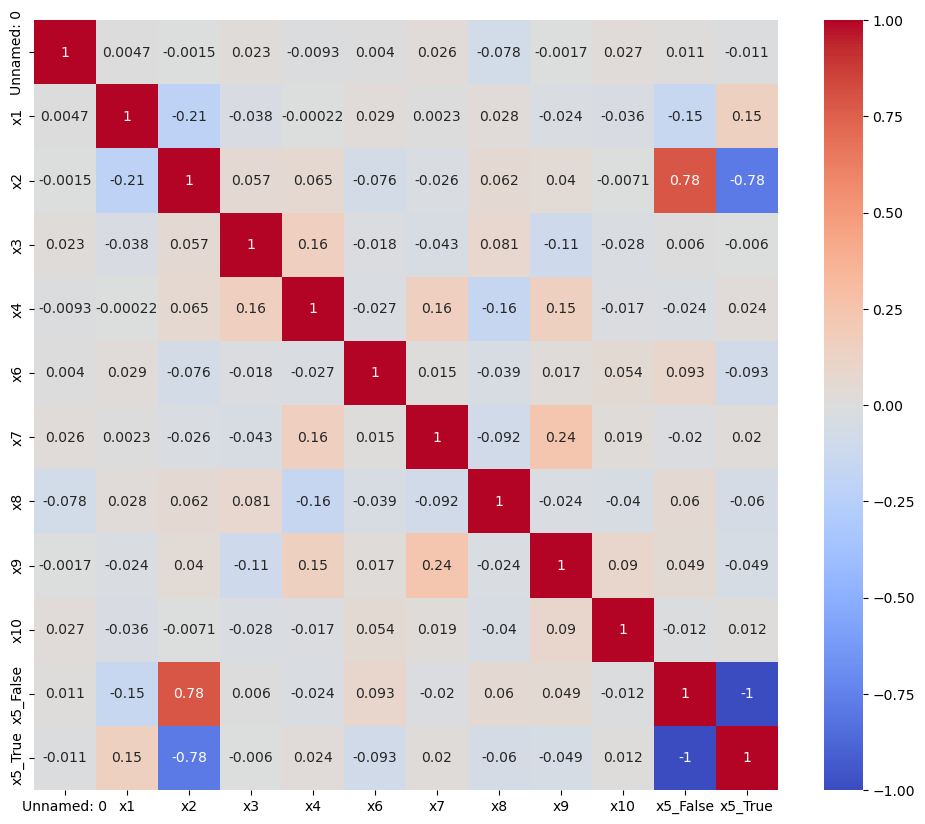

In [10]:
# Create a heatmap to see the correlation between the columns
plt.figure(figsize=(12, 10))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Building a logistic regression model
logreg = LogisticRegression(penalty='l2', max_iter=10000, class_weight='balanced', solver='lbfgs')
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('y', axis=1), dataframe['y'], test_size=0.3)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cv = StratifiedKFold(n_splits=5,shuffle=True)
scores = cross_val_score(logreg, X_train, y_train, cv=cv)
print("The scores below are for the logistic regression model")
print(scores)
print(scores.mean())
print(scores.std())
print("The accuracy score is: ", accuracy_score(y_test, y_pred))
print('\n')

# Building a random forest model
rfc_entropy = RandomForestClassifier(criterion='entropy',n_estimators=150, max_depth=7, min_samples_split=3, min_samples_leaf=1, verbose=0, class_weight='balanced')
rfc_entropy.fit(X_train, y_train)
y_pred = rfc_entropy.predict(X_test)
cv = StratifiedKFold(n_splits=5,shuffle=True)
scores = cross_val_score(rfc_entropy, X_train, y_train, cv=cv)
print("The scores below are for the random forest model with entropy")
print(scores)
print(scores.mean())
print(scores.std())
print("The accuracy score is: ", accuracy_score(y_test, y_pred))
print('\n')

# Building a random forest model with gini
rfc_gini = RandomForestClassifier(criterion='gini',n_estimators=150, max_depth=7, min_samples_split=3, min_samples_leaf=1, class_weight='balanced' , verbose=0, )
rfc_gini.fit(X_train, y_train)
y_pred = rfc_gini.predict(X_test)
cv = StratifiedKFold(n_splits=5,shuffle=True)
scores = cross_val_score(rfc_gini, X_train, y_train, cv=cv)
print("The scores below are for the random forest model with gini")
print(scores)
print(scores.mean())
print(scores.std())
print("The accuracy score is: ", accuracy_score(y_test, y_pred))
print('\n')

# Buildi

# Building a naive bayes model
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cv = StratifiedKFold(n_splits=5,shuffle=True)
scores = cross_val_score(gnb, X_train, y_train, cv=cv)
print("The scores below are for the naive bayes model")
print(scores)
print(scores.mean())
print(scores.std())
print("The accuracy score is: ", accuracy_score(y_test, y_pred))
print('\n')



# Naives bayes model with AdaBoost
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=gnb, n_estimators=50, learning_rate=0.1, algorithm='SAMME.R', random_state=None)
adaBoost.fit(X_train, y_train)

y_pred = adaBoost.predict(X_test)
cv = StratifiedKFold(n_splits=5,shuffle=True)
scores = cross_val_score(adaBoost, X_train, y_train, cv=cv)
print("The scores below are for the naive bayes model with AdaBoost")
print(scores)
print(scores.mean())
print(scores.std())
print("The accuracy score is: ", accuracy_score(y_test, y_pred))
print('\n')


# Do a stacked classifier
from sklearn.ensemble import StackingClassifier

estimators = [('rfc_entropy', rfc_entropy), ('rfc_gini', rfc_gini), ('logreg', logreg), ('gnb', gnb), ('adaBoost', adaBoost)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
cv = StratifiedKFold(n_splits=5,shuffle=True)
scores = cross_val_score(stacking, X_train, y_train, cv=cv)
print("The scores below are for the stacked model")
print(scores)
print(scores.mean())
print(scores.std())
print("The accuracy score is: ", accuracy_score(y_test, y_pred))
print('\n')


The scores below are for the logistic regression model
[0.73571429 0.75       0.70714286 0.73571429 0.75714286]
0.7371428571428572
0.017142857142857123
The accuracy score is:  0.67


The scores below are for the random forest model with entropy
[0.76428571 0.74285714 0.76428571 0.77142857 0.72857143]
0.7542857142857142
0.016035674514745465
The accuracy score is:  0.7133333333333334


The scores below are for the random forest model with gini
[0.75714286 0.80714286 0.77857143 0.75714286 0.70714286]
0.7614285714285715
0.032763842689084895
The accuracy score is:  0.6966666666666667


The scores below are for the naive bayes model
[0.70714286 0.72857143 0.75714286 0.75       0.72857143]
0.7342857142857143
0.017728105208558352
The accuracy score is:  0.72


The scores below are for the naive bayes model with AdaBoost
[0.70714286 0.8        0.72857143 0.66428571 0.77142857]
0.7342857142857142
0.04768091219508184
The accuracy score is:  0.6866666666666666


The scores below are for the stacke

In [12]:
# Check precision, recall, f1-score and support for the stacked model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Atsuto       0.80      0.65      0.72       103
         Bob       0.72      0.86      0.78        91
        Jorg       0.69      0.70      0.69       106

    accuracy                           0.73       300
   macro avg       0.73      0.74      0.73       300
weighted avg       0.74      0.73      0.73       300



### Making the predictions 
Here we make the predictions thereafter we will evaluate the model 

In [32]:
final_data = pd.read_csv('EvaluateOnMe-7.csv')

# Describe column 1
#final_data['x1'].describe()
#final_data['x1'] = (final_data['x1'] - final_data['x1'].mean()) / final_data['x1'].std()
#final_data['x2'].describe()
#final_data['x2'] = (final_data['x2'] - final_data['x2'].mean()) / final_data['x2'].std()
#final_data['x3'].describe()
#final_data['x3'] = (final_data['x3'] - final_data['x3'].mean()) / final_data['x3'].std()
#final_data['x4'].describe()
final_data['x4'] = (final_data['x4'] - final_data['x4'].mean()) / final_data['x4'].std()

# Hot encode the x5 column
final_data = pd.get_dummies(final_data, columns=['x5'])

# Frequency encode the x6 column
final_data['x6'] = final_data['x6'].map(final_data['x6'].value_counts())
final_data['x6'] = (final_data['x6'] - final_data['x6'].mean()) / final_data['x6'].std()
final_data['x7'] = (final_data['x7'] - final_data['x7'].mean()) / final_data['x7'].std()
final_data['x8'] = (final_data['x8'] - final_data['x8'].mean()) / final_data['x8'].std()
final_data['x9'] = (final_data['x9'] - final_data['x9'].mean()) / final_data['x9'].std()
final_data['x10'] = (final_data['x10'] - final_data['x10'].mean()) / final_data['x10'].std()

# Predict the y column
y_pred = stacking.predict(final_data)

# Create a dataframe with the predicted y column
final_data['y'] = y_pred

# Drop all other columns that is not y
final_data = final_data.drop(['x1', 'x2', 'x3', 'x4', 'x5_False', 'x5_True', 'x6', 'x7', 'x8', 'x9', 'x10',], axis=1)

# View dataframe
final_data.head()

# Drop the index column
final_data = final_data.drop(['Unnamed: 0'], axis=1)
final_data.head()

# Save the dataframe to a txt file and remove headers
final_data.to_csv('Predicted.txt', header=False, index=False)


